In [ ]:
import pandas as pd
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
import seaborn as sns
import numpy as np


In [42]:
df = pd.read_csv(r"C:\Users\Johnt\Downloads\diabetes.csv")

In [43]:
df["Outcome"].unique()

array([1, 0])

In [44]:
# Split the data into Feature Matrix and Target Vector
X = df.drop(columns=["Outcome"])

y = df["Outcome"]

In [45]:
# Instantiate the standard scaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [46]:
# Create tensors from the X and y data
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X_tensor, y_tensor, test_size=0.2, random_state=0
)

print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])

Train size: 614
Test size: 154


In [34]:
# Define the model
model = nn.Sequential(
    nn.Linear(8, 16),    # Input layer to Hidden layer (13, 16)
    nn.ReLU(),            # Activation
    nn.Linear(16, 1),      # Hidden to output (16, 1)
    nn.Sigmoid()          # Output activation for binary classification
)


# Show architecture
print(model)

Sequential(
  (0): Linear(in_features=8, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=1, bias=True)
  (3): Sigmoid()
)


A sigmoid activation function is used at the end because the model's output is expected to be a probability between 0 and 1. This matches with the `Outcome` labels in the dataset.

In [35]:
# Count the total number of parameters in the code
sum(p.numel() for p in model.parameters())

161

Calculate the `Loss Function` and `Optimizer`

In [47]:
# The Loss Function
loss_fn = nn.BCELoss()

# The Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


print("Loss function:", loss_fn)
print("Optimizer:", optimizer)

Loss function: BCELoss()
Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    decoupled_weight_decay: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)


Training the Model (Looping Over Epochs)

In [48]:
# Number of Epoch
num_epochs = 200
train_losses = []

for epoch in range(num_epochs):
    model.train()


    # Forward Pass
    outputs = model(X_train)
    loss = loss_fn(outputs, y_train)

    # Backward Pass and Optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Save Loss
    train_losses.append(loss.item())

    # Print every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], {loss.item(): .4f}")

Epoch [10/200],  0.2773
Epoch [20/200],  0.2743
Epoch [30/200],  0.2734
Epoch [40/200],  0.2724
Epoch [50/200],  0.2715
Epoch [60/200],  0.2706
Epoch [70/200],  0.2697
Epoch [80/200],  0.2690
Epoch [90/200],  0.2683
Epoch [100/200],  0.2677
Epoch [110/200],  0.2669
Epoch [120/200],  0.2662
Epoch [130/200],  0.2656
Epoch [140/200],  0.2651
Epoch [150/200],  0.2646
Epoch [160/200],  0.2640
Epoch [170/200],  0.2633
Epoch [180/200],  0.2625
Epoch [190/200],  0.2618
Epoch [200/200],  0.2612


In [40]:
# Test Loss Tracking
num_epochs = 200
train_losses = []
test_losses = []   # Track test loss

for epoch in range(num_epochs):
    model.train()

    # Forward pass (training)
    outputs = model(X_train)
    loss = loss_fn(outputs, y_train)


    # Backward Pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    # Save training loss
    train_losses.append(loss.item())

    # Evaluate on test set
    model.eval()     #Set model to evauation mode
    with torch.no_grad():
        test_outputs = model(X_test)
        test_loss = loss_fn(test_outputs, y_test)


        # Store test loss in test_losses list
        test_losses.append(test_loss.item())


# Print every 10 epochs
        if (epoch + 1) % 10 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], "
                    f"Train Loss: {loss.item():.4f}, "
                    f"Test Loss: {test_loss.item():.4f}")  # 👈 Replace with actual test loss


Epoch [10/200], Train Loss: 0.3250, Test Loss: 0.6311
Epoch [20/200], Train Loss: 0.3225, Test Loss: 0.6340
Epoch [30/200], Train Loss: 0.3192, Test Loss: 0.6375
Epoch [40/200], Train Loss: 0.3161, Test Loss: 0.6458
Epoch [50/200], Train Loss: 0.3126, Test Loss: 0.6576
Epoch [60/200], Train Loss: 0.3096, Test Loss: 0.6659
Epoch [70/200], Train Loss: 0.3069, Test Loss: 0.6787
Epoch [80/200], Train Loss: 0.3044, Test Loss: 0.6879
Epoch [90/200], Train Loss: 0.3019, Test Loss: 0.6959
Epoch [100/200], Train Loss: 0.2996, Test Loss: 0.7060
Epoch [110/200], Train Loss: 0.2973, Test Loss: 0.7127
Epoch [120/200], Train Loss: 0.2948, Test Loss: 0.7232
Epoch [130/200], Train Loss: 0.2925, Test Loss: 0.7307
Epoch [140/200], Train Loss: 0.2903, Test Loss: 0.7474
Epoch [150/200], Train Loss: 0.2878, Test Loss: 0.7531
Epoch [160/200], Train Loss: 0.2857, Test Loss: 0.7607
Epoch [170/200], Train Loss: 0.2837, Test Loss: 0.7725
Epoch [180/200], Train Loss: 0.2819, Test Loss: 0.7708
Epoch [190/200], Tr

Visualizing the Model

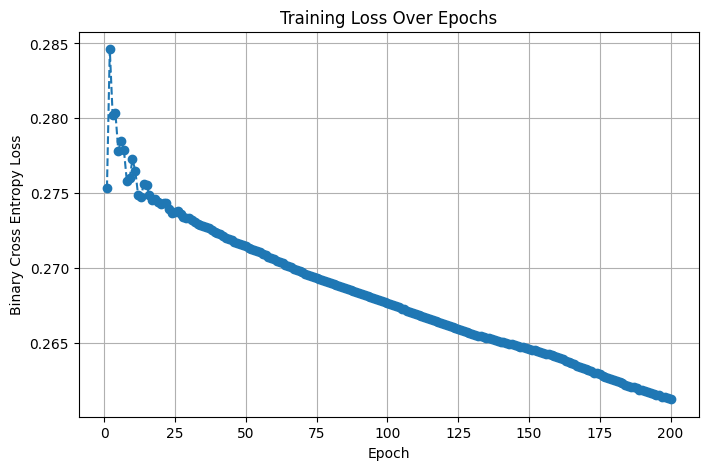

In [49]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_epochs + 1), train_losses, linestyle='--', marker='o')
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Binary Cross Entropy Loss")
plt.grid(True)
plt.show()
    

In [50]:
model.eval()
with torch.no_grad():
    y_train_pred = model(X_train)
    y_train_pred = (y_train_pred > 0.5).float()


# Confusion Matrix
confusion_matrix(y_train, y_train_pred)

array([[369,  24],
       [ 32, 189]])

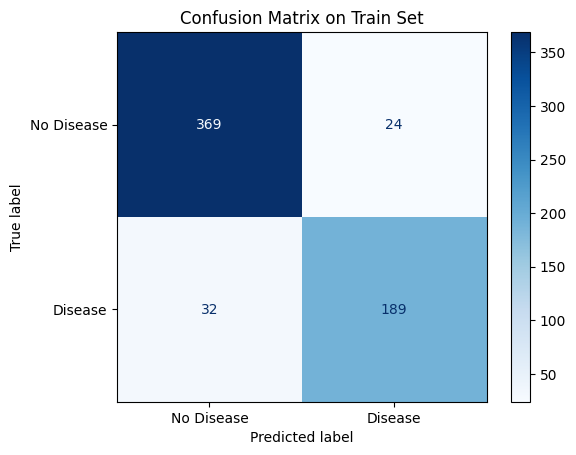

In [52]:
# Plot Confusion Matrix
cm = confusion_matrix(y_train, y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Disease", "Disease"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix on Train Set")
plt.grid(False)
plt.show()

In [55]:
#  Put model in evaluation mode
model.eval()

# Turn off gradient tracking
with torch.no_grad():
    y_train_logits = model(X_train)
    y_train_probs = torch.sigmoid(y_train_logits)
    y_train_preds = (y_train_probs >= 0.5).float()   #threshold at 0.5

    # Compute test loss
    train_loss = loss_fn(y_train_logits, y_train)

# Accuracy 
train_acc = accuracy_score(y_train.numpy(), y_train_preds.numpy())


print(f"Train Loss: {train_loss.item():.4f}")
print(f"Train Accuracy: {train_acc * 100:.2f}%")

Train Loss: 0.2612
Train Accuracy: 35.99%


We see a `smooth decreasing loss` that suggests that:
- The model is `learning` useful patterns from the training data
- The optimizer (Adam) and learning rate are `appropriate`
- There is likely not the case of an underfitting or overfitting

Evaluate the Model on Test Set

In [57]:
# Put model in Evaluation Mode
model.eval()

# Turn off Gradient Tracking
with torch.no_grad():
    y_test_logits = model(X_test)
    y_test_probs = torch.sigmoid(y_test_logits)
    y_test_preds = (y_test_probs >= 0.5).float()   # threshold at 0.5


    # Compute test loss
    test_loss = loss_fn(y_test_logits, y_test)

# Accuracy
test_acc = accuracy_score(y_test.numpy(), y_test_preds.numpy())

print(f"Test Loss: {test_loss.item():.4f}")
print(f"Test Accuracy: {test_acc * 100:2f}%")

Test Loss: 0.8864
Test Accuracy: 30.519481%


Using the `Confusion Matrix`

In [58]:
# Predicting based on train set
model.eval()
with torch.no_grad():
    y_test_pred = model(X_test)
    y_test_pred = (y_test_pred > 0.5).float()

# confusion matrix
confusion_matrix(y_test, y_test_pred)

array([[83, 24],
       [15, 32]])

Plot `Confusion Matrix`

In [1]:
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Disease", "Disease"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix on Test Set")
plt.grid(False)
plt.show()

NameError: name 'confusion_matrix' is not defined